<a href="https://colab.research.google.com/github/anitamila/Python_Regression-Linear/blob/master/Python_Regression_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Linear

## Import Library

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# Load dataset
dataset = pd.read_csv('regression_data.csv')

## Load Data

In [ ]:
# Show dataset
print("Dataset preview:")
print(dataset.head())

Dataset preview:
   gre_score  toefl_score  univ_ranking  motiv_letter_strength  \
0        337          118             4                    4.5   
1        324          107             4                    4.0   
2        316          104             3                    3.0   
3        322          110             3                    3.5   
4        314          103             2                    2.0   

   recommendation_strength   gpa  research_exp  admit_prob  
0                      4.5  9.65             1        0.92  
1                      4.5  8.87             1        0.76  
2                      3.5  8.00             1        0.72  
3                      2.5  8.67             1        0.80  
4                      3.0  8.21             0        0.65  


In [ ]:
# Data Understanding
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                500 non-null    int64  
 1   toefl_score              500 non-null    int64  
 2   univ_ranking             500 non-null    int64  
 3   motiv_letter_strength    500 non-null    float64
 4   recommendation_strength  500 non-null    float64
 5   gpa                      500 non-null    float64
 6   research_exp             500 non-null    int64  
 7   admit_prob               500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
dataset.describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Data Cleansing

In [ ]:
# Missing Value
dataset.isnull().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_prob                 0
dtype: int64

In [ ]:
# Redundancy Data
dataset.duplicated().sum()

0

## Correlation Data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

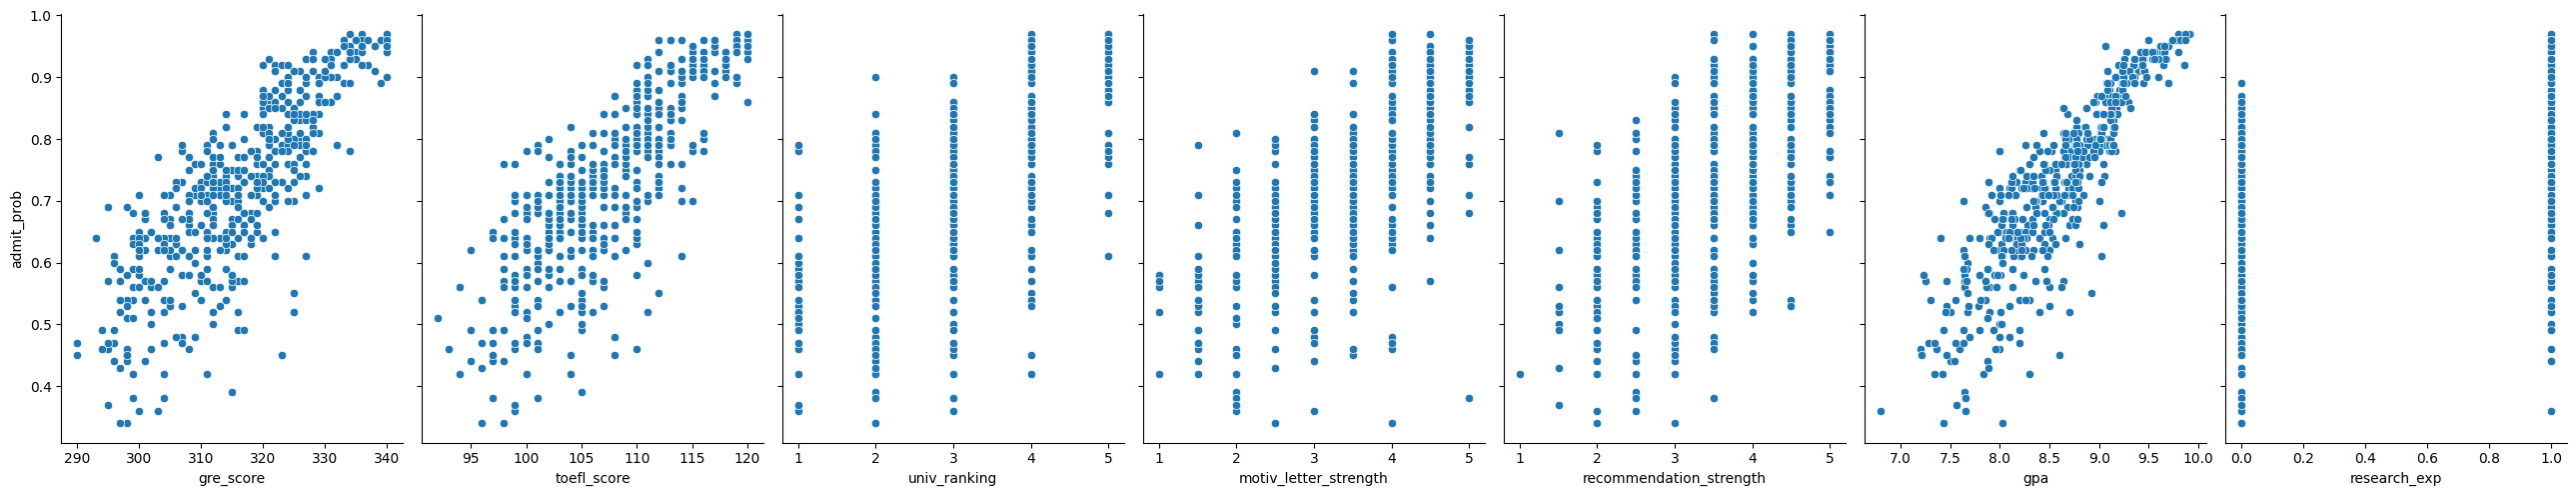

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=dataset, x_vars=['gre_score','toefl_score','univ_ranking','motiv_letter_strength',
                                   'recommendation_strength','gpa','research_exp'], y_vars=['admit_prob'],
             size=5, aspect=0.75)
plt.show()

In [ ]:
# Correlation value of independent variable and dependent variable
dataset.corr().style.background_gradient().set_precision(2)

<ipython-input-11-3c224451b2b8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  dataset.corr().style.background_gradient().set_precision(2)


,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
gre_score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
toefl_score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
univ_ranking,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
motiv_letter_strength,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
recommendation_strength,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
gpa,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
research_exp,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
admit_prob,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


In [ ]:
# Define the independent variable and dependent variable
X = dataset.drop(columns='admit_prob')
y = dataset[['admit_prob']]

In [ ]:
# Split dataset into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train)

400

In [ ]:
len(X_test)

100

In [ ]:
len(y_train)

400

In [ ]:
len(y_test)

100

## Modeling

In [ ]:
# convert data into numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().ravel()

In [ ]:
# Modeling
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Coefficients dan Intercept
print("Coefficients:", linreg.coef_)
print("Intercept:", linreg.intercept_)

Coefficients: [0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]
Intercept: -1.4214470719016465


In [ ]:
# retrieve the coefficients
# show as a nice dataframe

coef_dict = {
    'features':['intercept'] + X.columns.tolist(),
    'coefficient':[linreg.intercept_] + list(linreg.coef_)
}
coef_df = pd.DataFrame(coef_dict, columns=['features', 'coefficient'])
coef_df

,features,coefficient
0,intercept,-1.421447
1,gre_score,0.002434
2,toefl_score,0.002996
3,univ_ranking,0.002569
4,motiv_letter_strength,0.001814
5,recommendation_strength,0.017238
6,gpa,0.112527
7,research_exp,0.024027


## Prediction and Evaluation

In [ ]:
# create prediction vector on training data
y_pred_train = linreg.predict(X_train)

print('MAE for traning_data is {}'.format(mean_absolute_error(y_train, y_pred_train)))
print('MAPE for traning_data is {}'.format(mean_absolute_percentage_error(y_train, y_pred_train)))

MAE for traning_data is 0.04253334061164317
MAPE for traning_data is 0.06848166838244786


In [ ]:
# prepare prediction result on test data
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().ravel()

In [ ]:
# model evaluation on test data

# create prediction vector on training data
y_pred_test = linreg.predict(X_test)

print('MAE for test data is {}'.format(mean_absolute_error(y_test, y_pred_test)))
print('MAPE for test data is {}'.format(mean_absolute_percentage_error(y_test, y_pred_test)))
print('R-squared (R2) for test data is {}'.format(r2_score(y_test, y_pred_test)))

MAE for test data is 0.042722654277053636
MAPE for test data is 0.06857756648317814
R-squared (R2) for test data is 0.8188432567829631


## Visualization

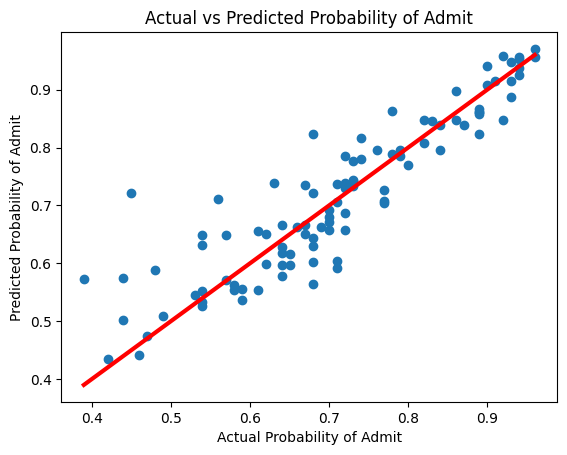

In [ ]:
# Visualization of the prediction result of testing data

plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=3)
plt.xlabel('Actual Probability of Admit')
plt.ylabel('Predicted Probability of Admit')
plt.title('Actual vs Predicted Probability of Admit')
plt.show()